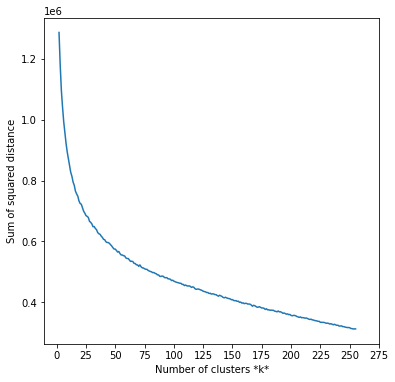

Testing accuracy : 0.961 


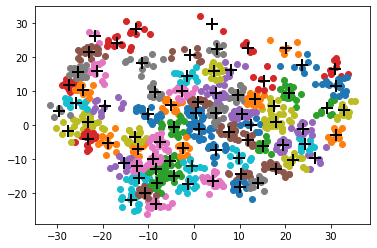

In [1]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Reads data from a given filename and processes it
def readData(fileName = 'mfeat-pix.txt'):

# Read data
    inputFile = open(fileName, 'r')
    dataDict = {}
    inputLines = inputFile.readlines()

    # Remove junk at front and start of line and split it into a list
    inputLines = [line.rstrip().lstrip().split('  ') for line in inputLines]

    # Turn list of Strings into a list of Ints
    for i in range(len(inputLines)):
        temp = []
        for j in inputLines[i]:
            temp.append(int(j))
        inputLines[i] = temp

    # Create list of tuples and determine number
    data = []
    for i in range(2000):
        data.append((inputLines[i], int(i/200)))
    return data

 #Splits the given data set into a train and test set (seperate features and their respective numbers)  
def splitData(data):
   
    # Create Empty lists  
    trainFeats = []
    trainNum = []
    testFeats = []
    testNum = []

    # Split data set in train and test set
    for i in range(2000):
        # 0-99 are train, 100-199 are test, etc
        if int(i / 100) % 2:
            testFeats.append(data[i][0])
            testNum.append(data[i][1])
        else:
            trainFeats.append(data[i][0])
            trainNum.append(data[i][1])
    return [np.array(trainFeats), np.array(trainNum), np.array(testFeats), np.array(testNum)]



def Model(data):
  x_train, y_train, x_test, y_test = splitData(data)                          # Assigning data
  sse = []  
  x1 = [80,80]
  y1 = [0,1]                                                                    # sum of squared error array
  list_k = [item for item in range(2,256)]                                     # K values 2-256
  for k in list_k:
    km = KMeans(n_clusters=k)                                                  #Kmeans model
    km.fit_predict(x_train)                                                    # Fitting training data
    sse.append(km.inertia_)                                                    # Storing sse
    reference_labels = retrieve_info(km.labels_,y_train)            #obtain each label of cluster label
    predicted_labels = get_labels(km,reference_labels)                         #Mapping predictions to original labels
  
   # Plotting k vs sse
  plt.figure(figsize=(6, 6))                                                    
  plt.plot(list_k, sse)
  plt.xticks(np.arange(0, 300, 25))
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Sum of squared distance');  
  plt.show()
  Kmean = KMeans(n_clusters=80)                                                #Model with chosen k
  Kmean.fit_predict(x_test)                                                    #testing on test data            
  referencee_labels = retrieve_info(Kmean.labels_,y_test)         #obtain each label of cluster label
  numberr_labels = get_labels(Kmean,referencee_labels)                           #Mapping predictions to original labels
  print('Testing accuracy : {} '.format(accuracy_score(numberr_labels, y_test)))
  
  #Plotting the result in 2 dimension with clusters and centroids 
  pca = PCA(2)
  df2 = pca.fit_transform(x_test)
  kmeans = KMeans(n_clusters = 80)
  label = kmeans.fit_predict(df2)
  u_labels = np.unique(label)
  for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
    centroidss = kmeans.cluster_centers_
    plt.scatter(centroidss[:, 0], centroidss[:, 1],marker='+', s=150, linewidths=0.5,color='black')
  plt.show()
  return sse,  list_k


#Loop to obtain each label of cluster label  
def retrieve_info(cluster_labels,y_train):
  reference_labels = {}
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

#Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters.labels_))
    for i in range(len(clusters.labels_)):
        temp_labels[i] = refernce_labels[clusters.labels_[i]]
    return temp_labels

def main():
  data = readData()
  ssee, k = Model(data)

  

if __name__ == "__main__":
    main()

    